# **Exploratory Data Analysis(EDA) of Stroke Predictions**

**Step 1: Import Python Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Step 2: Reading Dataset**

In [2]:
data = pd.read_csv("Dataset.csv")

**Step 3: Analyzing the Data**

In [3]:
#shape will display the no. of observations(rows) and features(columns) in the dataset
data.shape

(3390, 17)

In [4]:
#head() will display the top 5 observations of the dataset
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [5]:
#tail() will display the last 5 observations in the dataset
data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [6]:
#info()  helps to understand the data type and the information about data, including the no. of records in each column, data having null or not null,memory usage of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

**3.1 Check Duplication**

In [7]:
#nunique() based on several unique values in each column and the data description ,
#we can identify the continuous and categorical columns in the data. Duplicated data can be handled or removed based on futher analysis
data.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

**3.2 Check Missing Values**

In [8]:
#isnull() is widely been in all pre-processing steps to identify null values in the data
#this can impact on the accuracy, and reliability of our analysis.
data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [9]:
#precentage of missing values
(data.isnull().sum()/(len(data)))*100

id                 0.000000
age                0.000000
education          2.566372
sex                0.000000
is_smoking         0.000000
cigsPerDay         0.648968
BPMeds             1.297935
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.120944
sysBP              0.000000
diaBP              0.000000
BMI                0.412979
heartRate          0.029499
glucose            8.967552
TenYearCHD         0.000000
dtype: float64

In [10]:
mean_BMI = data['BMI'].mean()

# Replace null values with the mean
data['BMI'].fillna(mean_BMI, inplace=True)

In [11]:
mode_edu = data['education'].mode()[0]

# Replace null values with the mode
data['education'].fillna(mode_edu, inplace=True)

In [12]:
mode_glucose = data['glucose'].mode()[0]

# Replace null values with the mode
data['glucose'].fillna(mode_glucose, inplace=True)

In [13]:
mode_totCh = data['totChol'].mode()[0]

# Replace null values with the mode
data['totChol'].fillna(mode_edu, inplace=True)

In [14]:
mode_BPMeds = data['BPMeds'].mode()[0]

# Replace null values with the mode
data['BPMeds'].fillna(mode_BPMeds, inplace=True)

In [15]:
mode_cigsPerDay = data['cigsPerDay'].mode()[0]

# Replace null values with the mode
data['cigsPerDay'].fillna(mode_cigsPerDay, inplace=True)

In [16]:
mode_heartRate = data['heartRate'].mode()[0]

# Replace null values with the mode
data['heartRate'].fillna(mode_heartRate, inplace=True)

In [17]:
data.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**Step 4: Statistics Summary**

In [18]:
#describe() provides a statistics summary of data belonging to numerical data type such as int, float
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,3390.0,NaN,NaN,NaN,1694.5,978.753033,0.0,847.25,1694.5,2541.75,3389.0
age,3390.0,NaN,NaN,NaN,49.542183,8.592878,32.0,42.0,49.0,56.0,70.0
education,3390.0,NaN,NaN,NaN,1.946018,1.017568,1.0,1.0,2.0,3.0,4.0
sex,3390,2,F,1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_smoking,3390,2,NO,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cigsPerDay,3390.0,NaN,NaN,NaN,9.010619,11.862839,0.0,0.0,0.0,20.0,70.0
BPMeds,3390.0,NaN,NaN,NaN,0.029499,0.169224,0.0,0.0,0.0,0.0,1.0
prevalentStroke,3390.0,NaN,NaN,NaN,0.00649,0.080309,0.0,0.0,0.0,0.0,1.0
prevalentHyp,3390.0,NaN,NaN,NaN,0.315339,0.464719,0.0,0.0,0.0,1.0,1.0
diabetes,3390.0,NaN,NaN,NaN,0.025664,0.158153,0.0,0.0,0.0,0.0,1.0


In [19]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categrical Variables: ", cat_cols)
print('')
print("Numerical Variables: ", num_cols)

Categrical Variables:  ['sex', 'is_smoking']

Numerical Variables:  ['id', 'age', 'education', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


**Step 5: EDA Univariate Analysis**

Categorical Variables can be visualized using a Count plot, Bar cahrt, Pie plot, etc.

Numerical Variables can be visualized using Histogram, Boxplot, Density Plot, etc.


In the below fig. a hishtogram and boxplot is used to show the pattern of the variables, as some variables have skewness and outliers.

**Numerical Variables**

id
Skew : 0.0


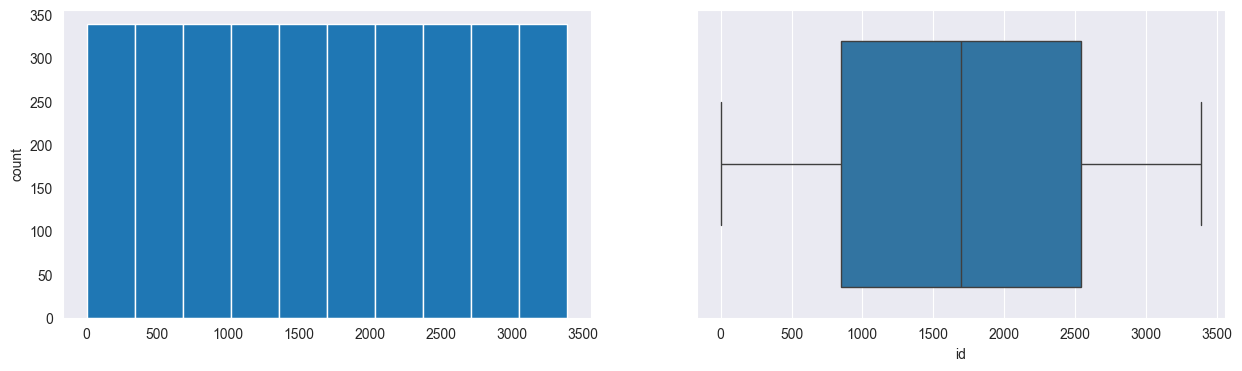

age
Skew : 0.23


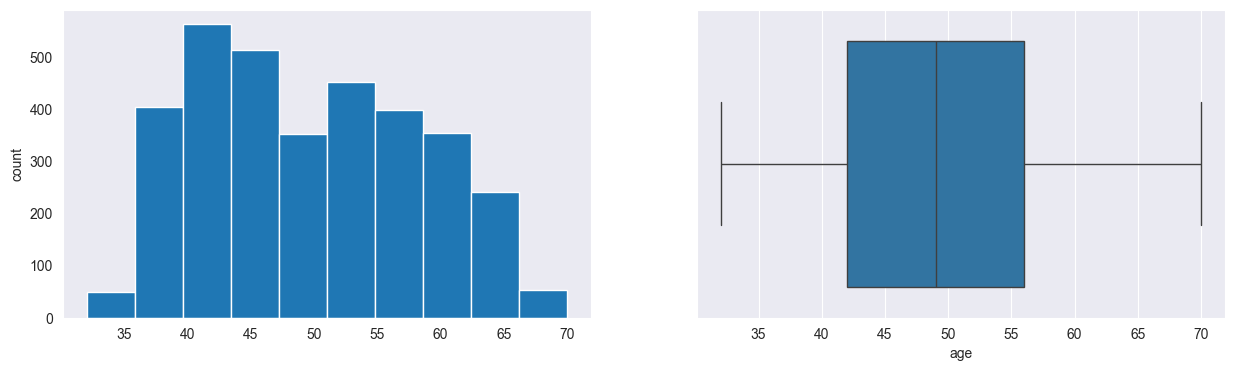

education
Skew : 0.74


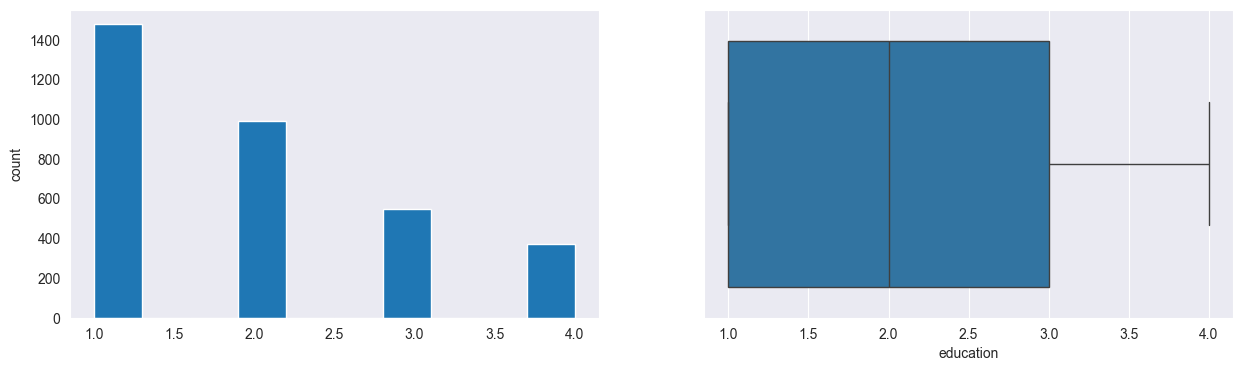

cigsPerDay
Skew : 1.23


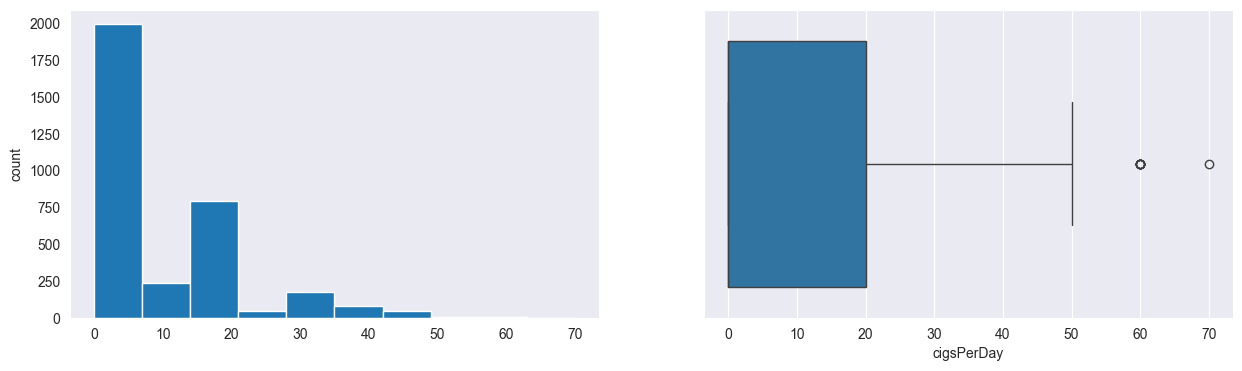

BPMeds
Skew : 5.56


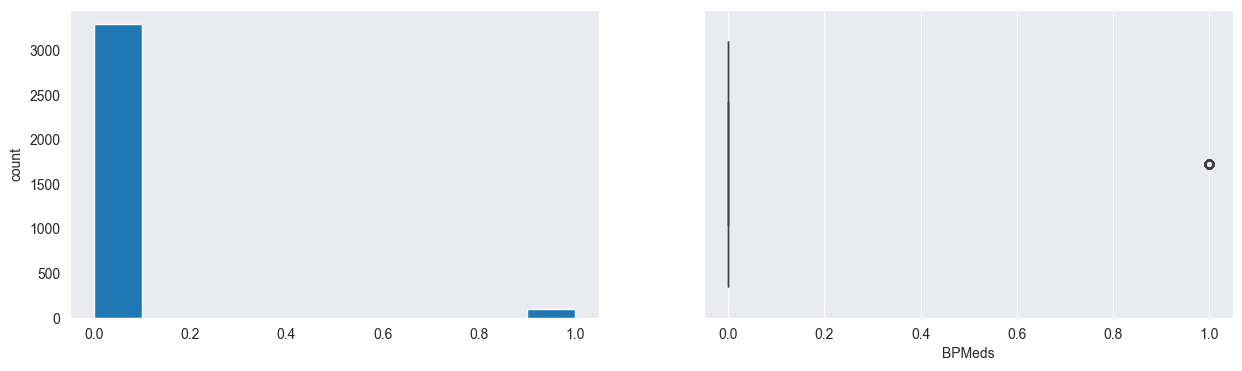

prevalentStroke
Skew : 12.3


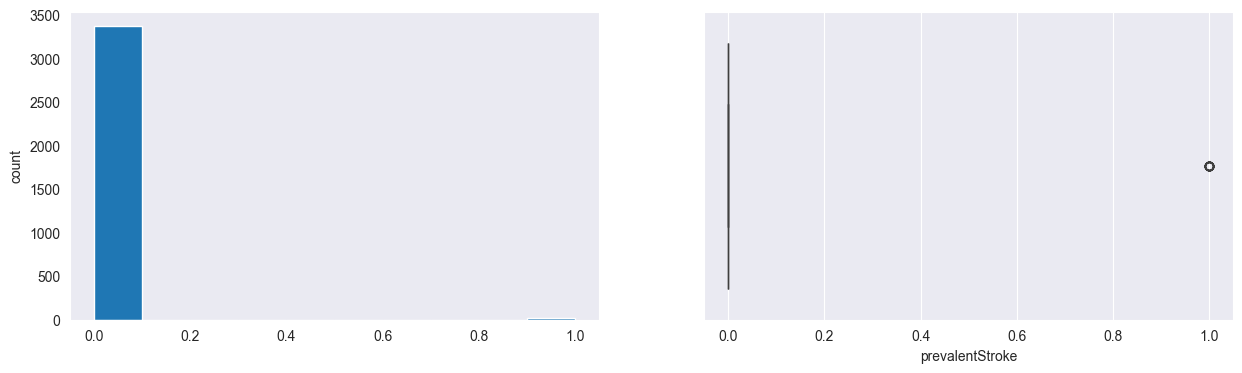

prevalentHyp
Skew : 0.8


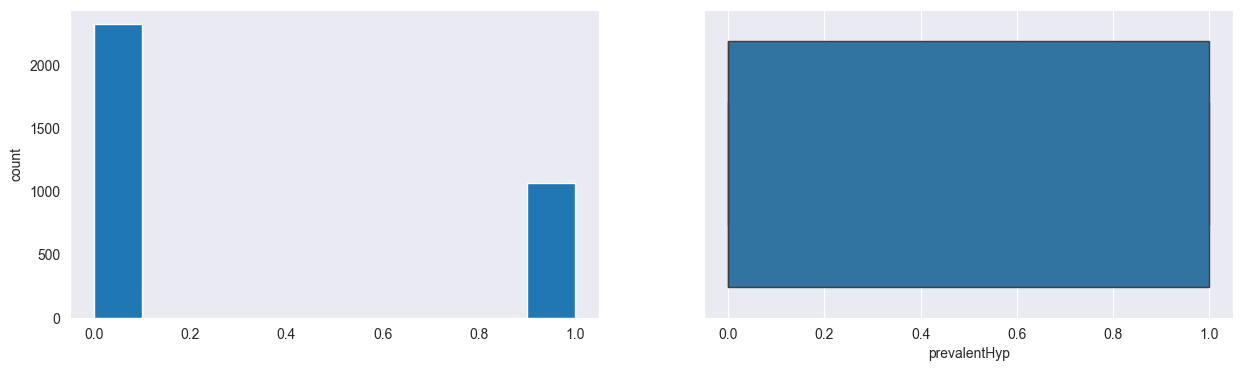

diabetes
Skew : 6.0


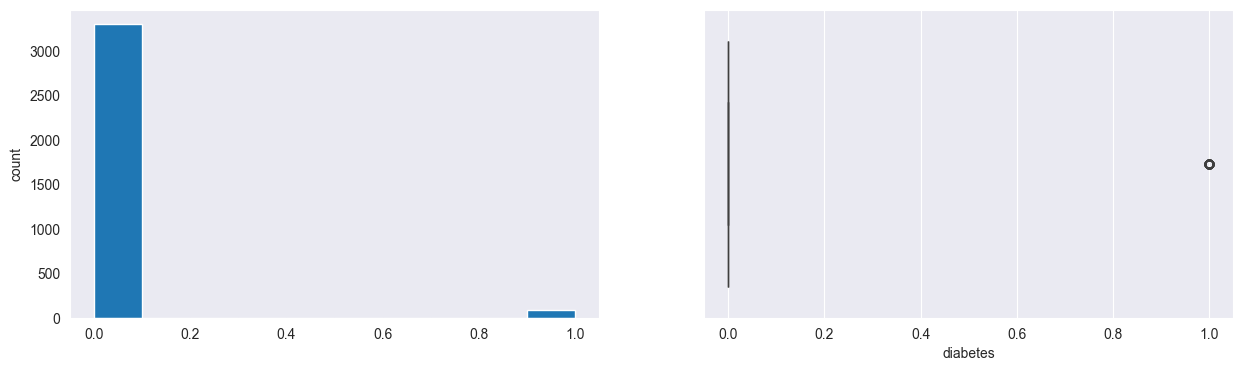

totChol
Skew : -0.3


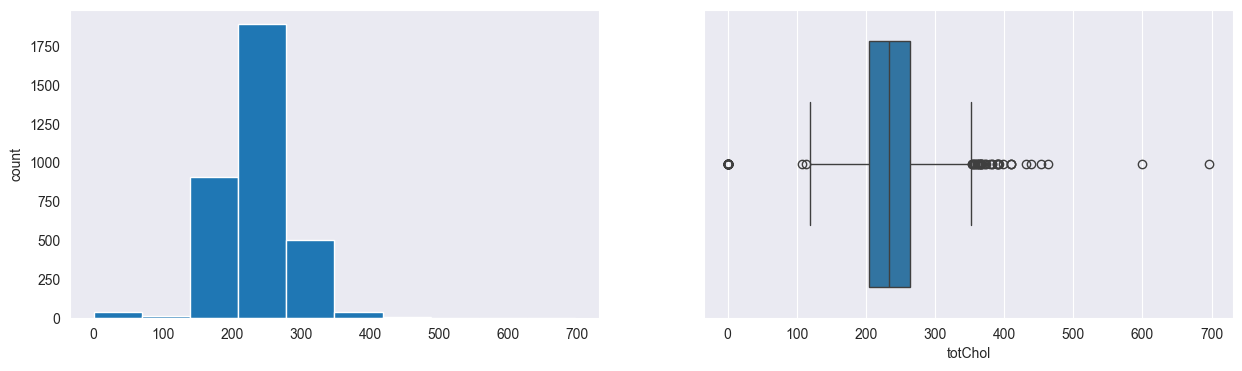

sysBP
Skew : 1.18


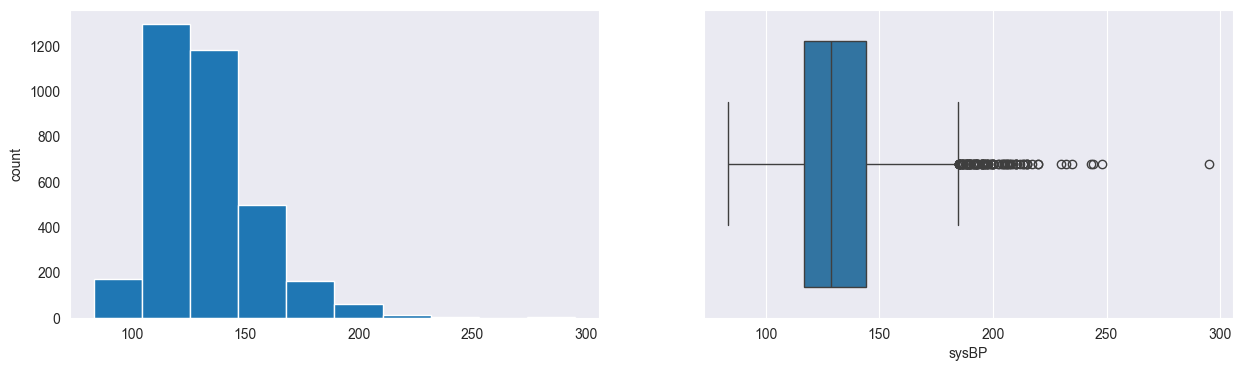

diaBP
Skew : 0.72


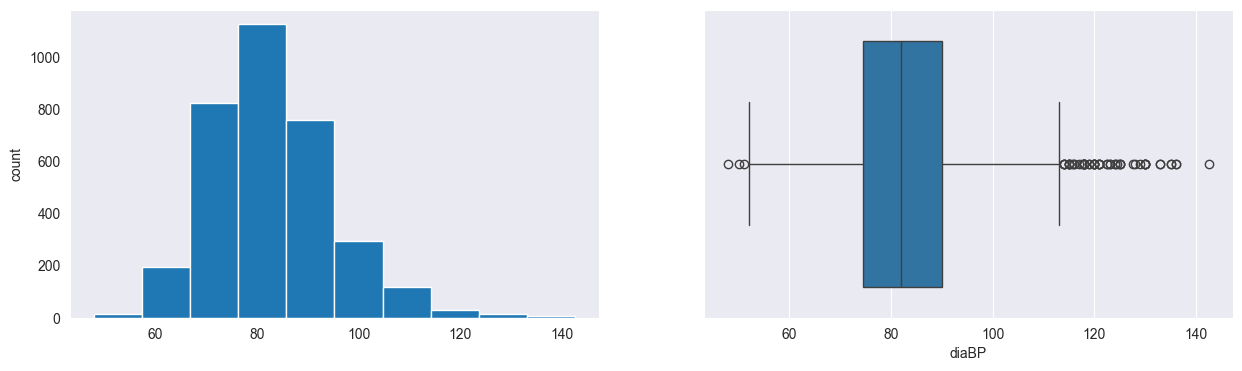

BMI
Skew : 1.02


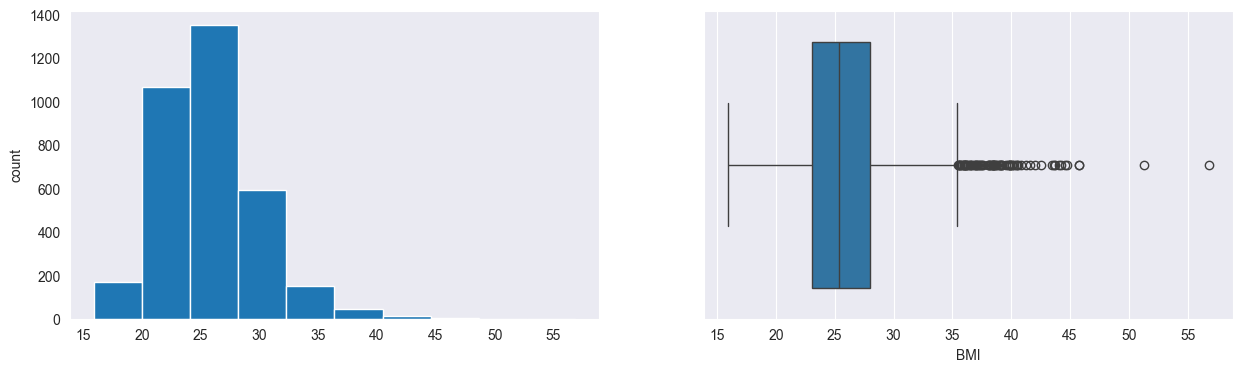

heartRate
Skew : 0.68


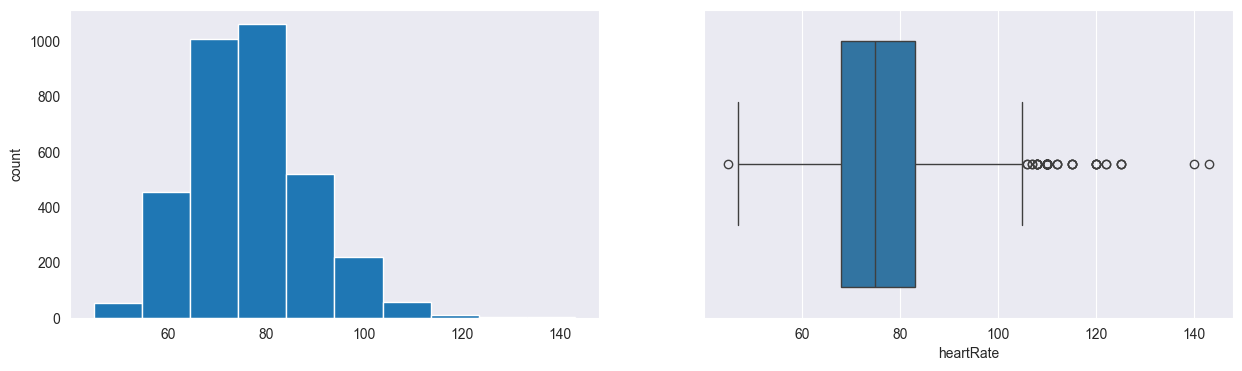

glucose
Skew : 6.45


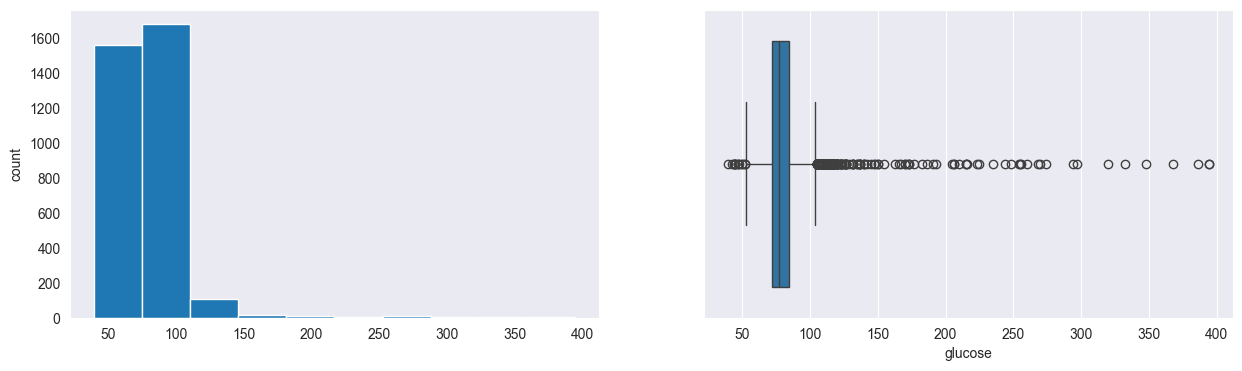

TenYearCHD
Skew : 1.95


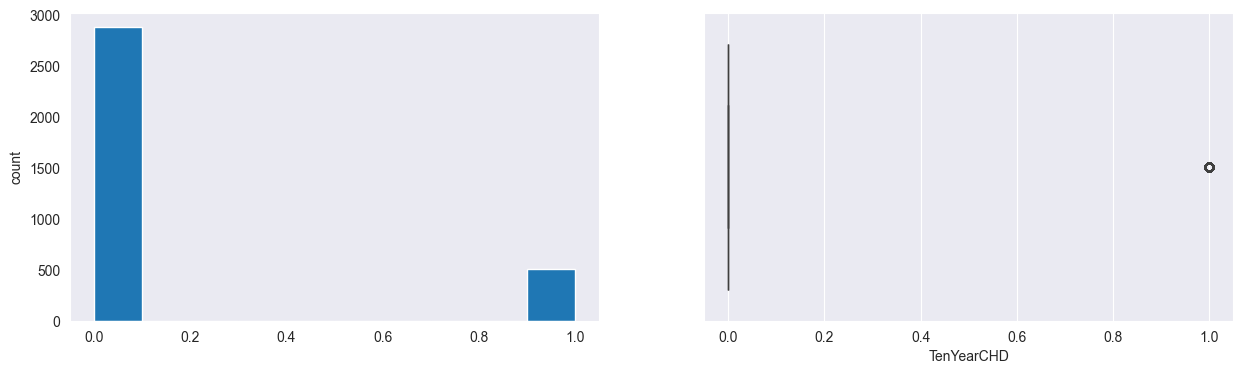

In [20]:
#Numerical Variables Data Visualization
# we calculate the skewness,which measures the asymmetry of the distribution.
for col in num_cols:
  print(col)
  print('Skew :',round(data[col].skew(),2))
  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  data[col].hist(grid=False)
  plt.ylabel('count')
  plt.subplot(1,2,2)
  sns.boxplot(x=data[col])
  plt.show()

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable




*   If the skewness is between -0.5 and 0.5, the distribution is considered approximately symmetric.
*   If the skewness is between -1 and -0.5 (or between 0.5 and 1), the distribution is moderately skewed.
*   If the skewness is less than -1 (or greater than 1), the distribution is highly skewed.

In a normally distributed dataset, skewness is zero, indicating perfect symmetry.
In a not normally distributed, the skewness indicates the direction and degree of asymmetry.

**Categorical Variables**

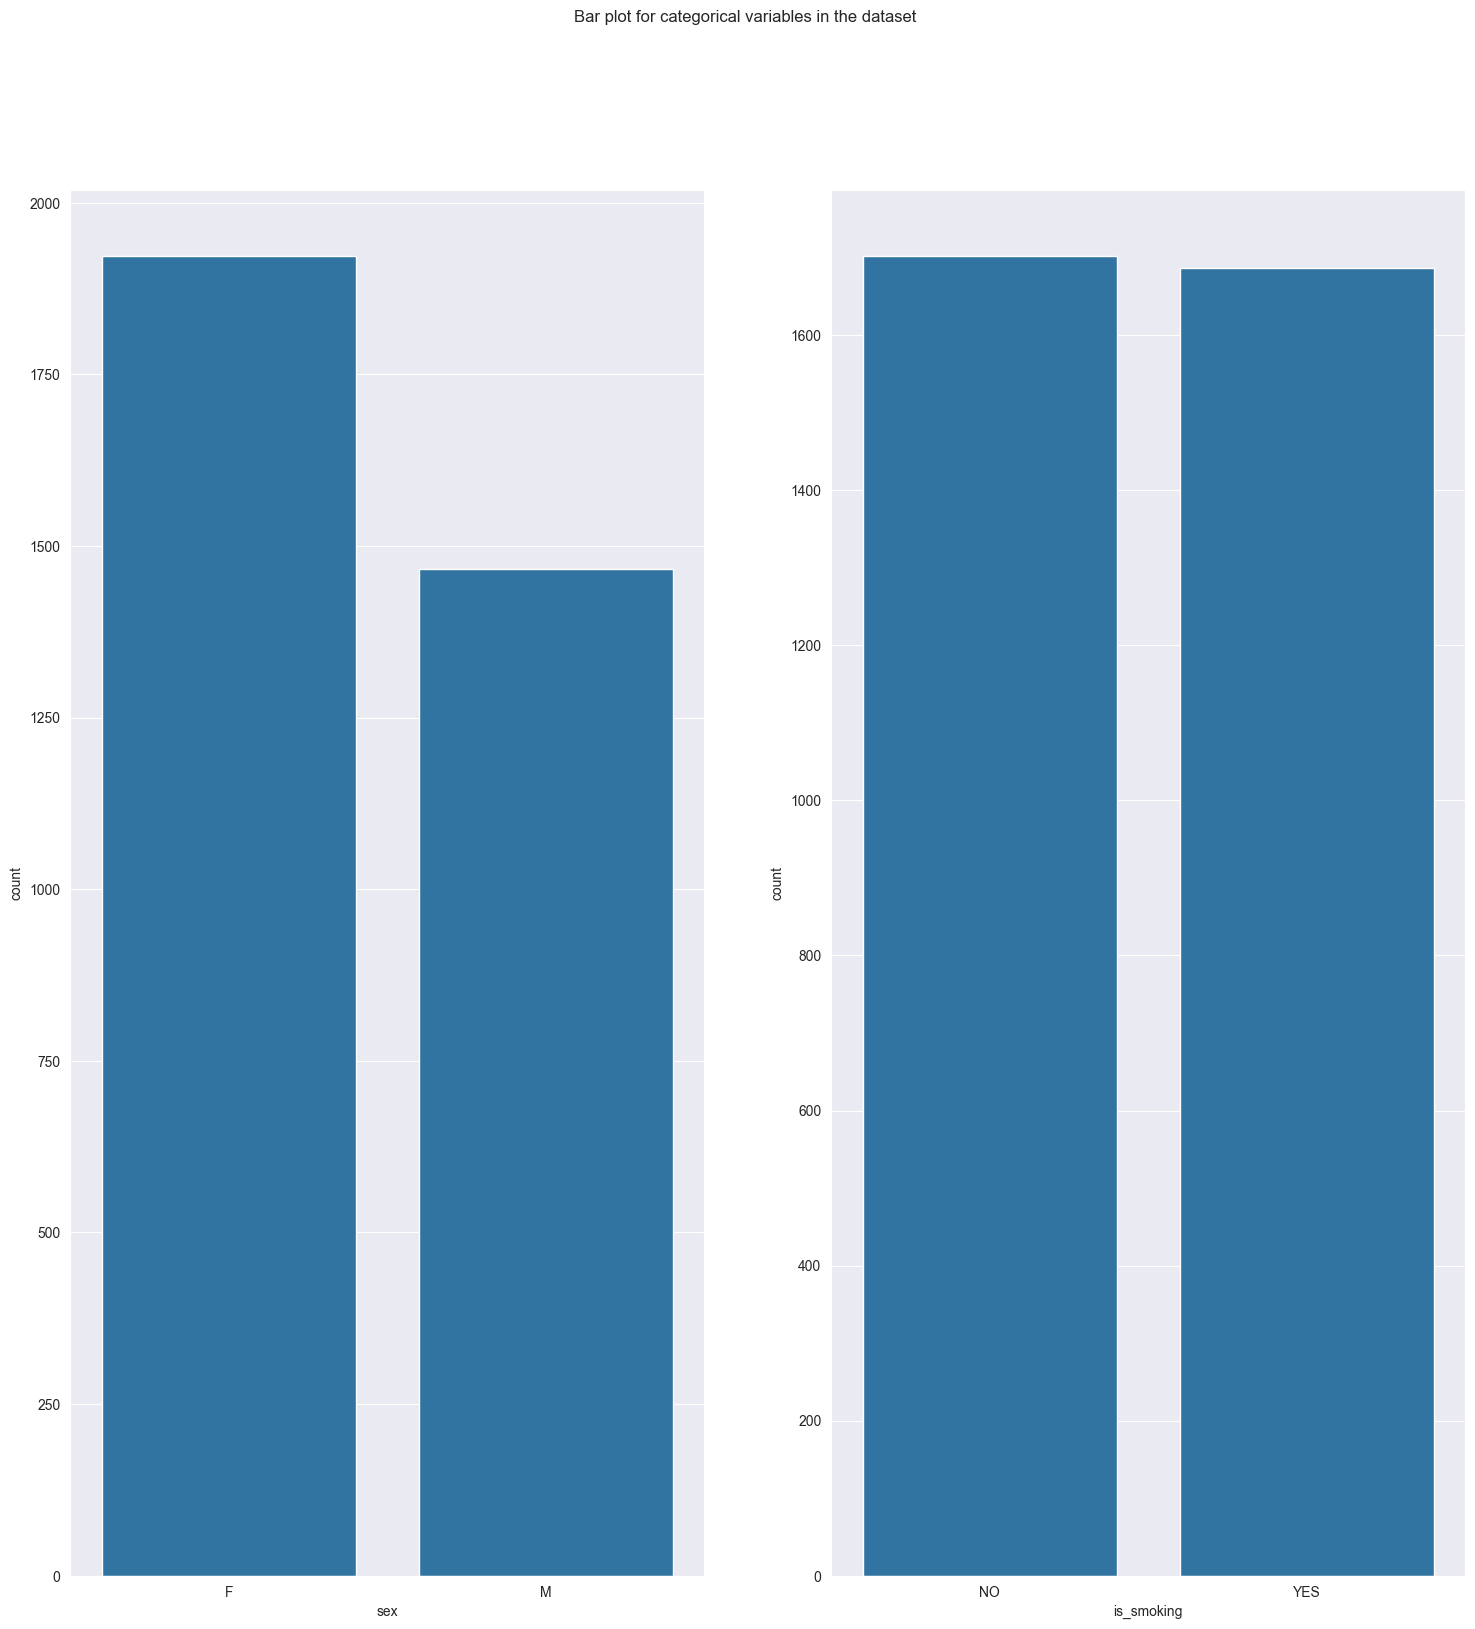

In [21]:
#Categorical Variables Data Visualization
# here we can gain insights into the distribution of genders and smaoking statuses in the dataset.
fig, axes = plt.subplots(1, 2, figsize = (18, 18))
fig.suptitle('Bar plot for categorical variables in the dataset')
sns.countplot(ax = axes[0], x = 'sex', data = data,
              order = data['sex'].value_counts().index);
sns.countplot(ax = axes[1], x = 'is_smoking', data = data,
              order = data['is_smoking'].value_counts().index);

In [22]:
selected_columnsA = ['age',	'education',	'cigsPerDay',	'BPMeds',	'prevalentStroke',	'prevalentHyp',	'diabetes',	'totChol',	'sysBP',	'diaBP',	'BMI',	'heartRate',	'glucose']

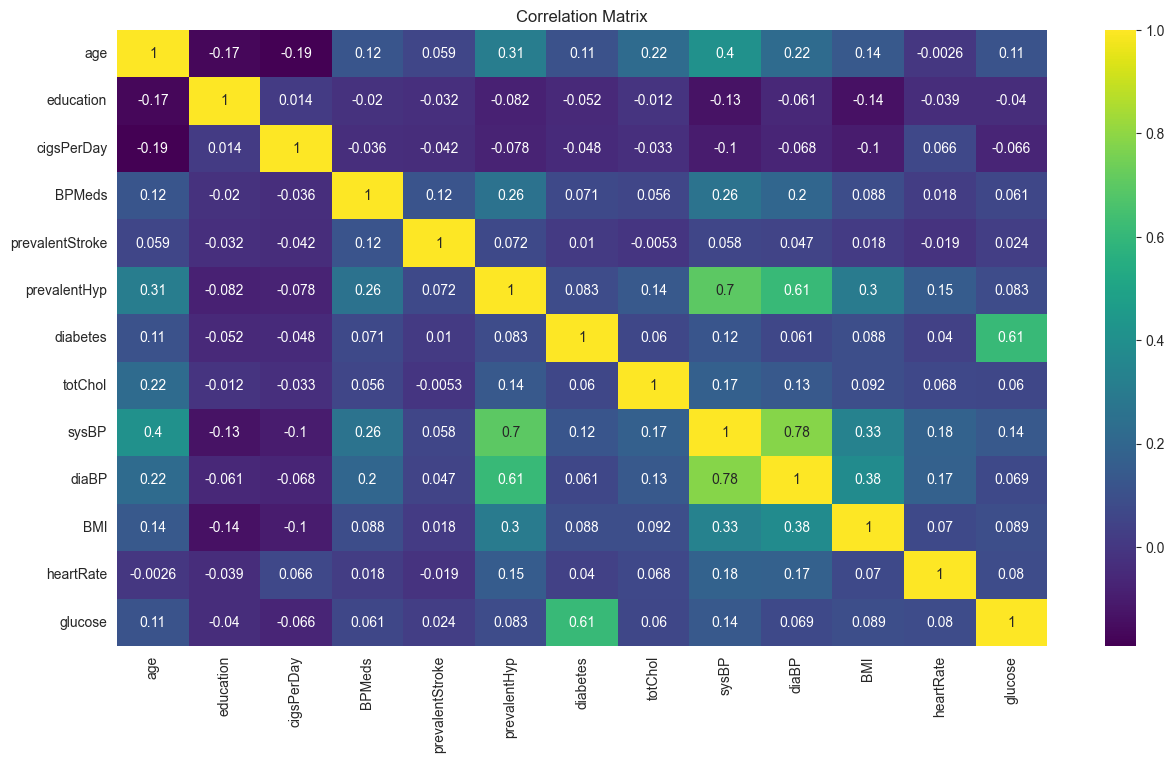

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = data[selected_columnsA].corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

Model Building

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [26]:
data.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             241
sysBP               226
diaBP               142
BMI                1260
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [27]:
data.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [28]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from collections import Counter

# Step 1: Load the dataset
data = pd.read_csv('Dataset.csv')

# Step 2: Encode categorical variables (if any)
categorical_columns = data.select_dtypes(include=['object']).columns  # Identify categorical columns
label_encoders = {}  # Store label encoders for future use

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Encode the column
    label_encoders[col] = le

# Step 3: Handle missing values
imputer = SimpleImputer(strategy='most_frequent')  # Impute missing values with the most frequent value
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Step 4: Split features (X) and target (y)
X = data.drop('TenYearCHD', axis=1)  # Replace 'target_column' with the actual target column name
y = data['TenYearCHD']               # Replace 'target_column' with the actual target column name

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 6: Apply SMOTE
print("Before SMOTE:", Counter(y_train))  # Check class distribution before SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
print("After SMOTE:", Counter(y_train_resampled))  # Check class distribution after SMOTE

# X_train_resampled and y_train_resampled are your balanced training datasets


Before SMOTE: Counter({0.0: 2303, 1.0: 409})
After SMOTE: Counter({0.0: 2303, 1.0: 2303})


  File "D:\Projects\car\.venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\manod\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\manod\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\manod\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 1456, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [29]:
data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0.0,64.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,22.91,90.0,80.0,1.0
1,1.0,36.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,2.0,46.0,1.0,0.0,1.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,3.0,50.0,1.0,1.0,1.0,20.0,0.0,0.0,1.0,0.0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,4.0,64.0,1.0,0.0,1.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385.0,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,261.0,123.5,79.0,29.28,70.0,103.0,0.0
3386,3386.0,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,199.0,102.0,56.0,21.96,80.0,84.0,0.0
3387,3387.0,44.0,3.0,1.0,1.0,3.0,0.0,0.0,1.0,0.0,352.0,164.0,119.0,28.92,73.0,72.0,1.0
3388,3388.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,191.0,167.0,105.0,23.01,80.0,85.0,0.0


In [30]:
data.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [31]:
# Get distinct values from the 'Type of Food' column
distinct_TenYearCHD = data['TenYearCHD'].unique()

print("Distinct values in 'TenYearCHD':", distinct_TenYearCHD)

Distinct values in 'TenYearCHD': [1. 0.]


In [32]:
# Get the counts of each class in the 'TenYearCHD' column
class_counts = data['TenYearCHD'].value_counts()

print("Counts of each class in 'TenYearCHD':")
print(class_counts)

Counts of each class in 'TenYearCHD':
TenYearCHD
0.0    2879
1.0     511
Name: count, dtype: int64


HyperParameter Tunning

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define parameter grid
params_lr = {"C": [0.1, 1, 10], "solver": ["liblinear", "lbfgs"]}

# Perform GridSearchCV
lr = LogisticRegression(random_state=42)
grid_lr = GridSearchCV(lr, params_lr, cv=5, scoring="accuracy", n_jobs=-1)
grid_lr.fit(X_train_resampled, y_train_resampled)

# Best parameters and accuracy
print("Best Parameters (Logistic Regression):", grid_lr.best_params_)
print("Best Score (Logistic Regression):", grid_lr.best_score_)


Best Parameters (Logistic Regression): {'C': 10, 'solver': 'liblinear'}
Best Score (Logistic Regression): 0.67064753250852


In [34]:
from sklearn.ensemble import RandomForestClassifier

# Define parameter grid
params_rf = {"n_estimators": [50, 100, 200], "max_depth": [None, 10, 20]}

# Perform GridSearchCV
rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, params_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf.fit(X_train_resampled, y_train_resampled)

# Best parameters and accuracy
print("Best Parameters (Random Forest):", grid_rf.best_params_)
print("Best Score (Random Forest):", grid_rf.best_score_)

Best Parameters (Random Forest): {'max_depth': None, 'n_estimators': 200}
Best Score (Random Forest): 0.8932418078058133


In [35]:
from sklearn.neighbors import KNeighborsClassifier

# Define parameter grid
params_knn = {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]}

# Perform GridSearchCV
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, params_knn, cv=5, scoring="accuracy", n_jobs=-1)
grid_knn.fit(X_train_resampled, y_train_resampled)

# Best parameters and accuracy
print("Best Parameters (KNN):", grid_knn.best_params_)
print("Best Score (KNN):", grid_knn.best_score_)

Best Parameters (KNN): {'n_neighbors': 3, 'weights': 'distance'}
Best Score (KNN): 0.8176303226003989


In [36]:
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid
params_dt = {"criterion": ["gini", "entropy"], "max_depth": [None, 10, 20]}

# Perform GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, params_dt, cv=5, scoring="accuracy", n_jobs=-1)
grid_dt.fit(X_train_resampled, y_train_resampled)

# Best parameters and accuracy
print("Best Parameters (Decision Tree):", grid_dt.best_params_)
print("Best Score (Decision Tree):", grid_dt.best_score_)

Best Parameters (Decision Tree): {'criterion': 'entropy', 'max_depth': 10}
Best Score (Decision Tree): 0.8343903754525049


MODELS

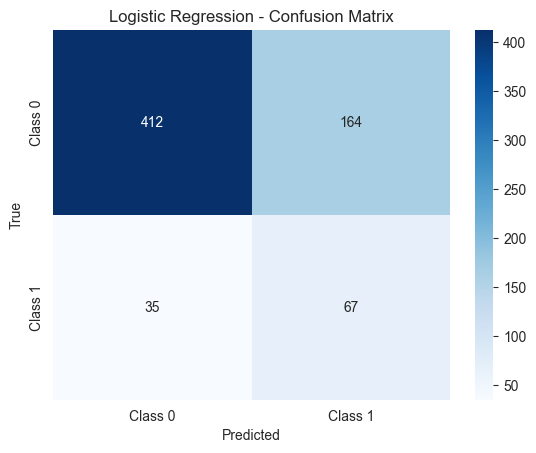

              precision    recall  f1-score   support

         0.0       0.92      0.72      0.81       576
         1.0       0.29      0.66      0.40       102

    accuracy                           0.71       678
   macro avg       0.61      0.69      0.60       678
weighted avg       0.83      0.71      0.74       678



In [37]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



# Example: Logistic Regression with best parameters
best_lr = LogisticRegression(C=10, solver="liblinear", random_state=42)
best_lr.fit(X_train_resampled, y_train_resampled)
y_pred_lr = best_lr.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print(classification_report(y_test, y_pred_lr))

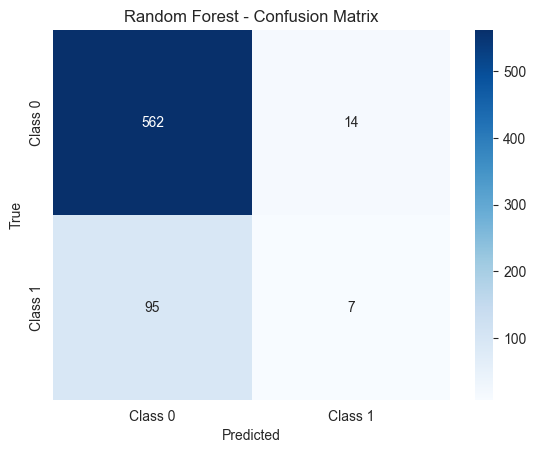

              precision    recall  f1-score   support

         0.0       0.86      0.98      0.91       576
         1.0       0.33      0.07      0.11       102

    accuracy                           0.84       678
   macro avg       0.59      0.52      0.51       678
weighted avg       0.78      0.84      0.79       678



In [38]:
# Example: Random Forest with best parameters
best_rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)  # Replace with best parameters
best_rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = best_rf.predict(X_test)


# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print(classification_report(y_test, y_pred_rf))

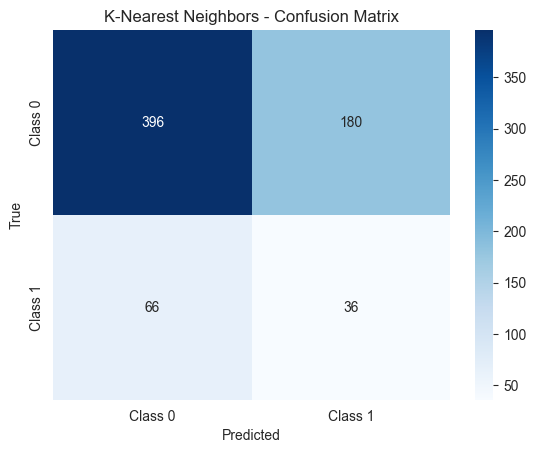

              precision    recall  f1-score   support

         0.0       0.86      0.69      0.76       576
         1.0       0.17      0.35      0.23       102

    accuracy                           0.64       678
   macro avg       0.51      0.52      0.49       678
weighted avg       0.75      0.64      0.68       678



In [39]:
# Example: KNN with best parameters
best_knn = KNeighborsClassifier(n_neighbors=3, weights="distance")  # Replace with best parameters
best_knn.fit(X_train_resampled, y_train_resampled)
y_pred_knn = best_knn.predict(X_test)


# Confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("K-Nearest Neighbors - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print(classification_report(y_test, y_pred_knn))

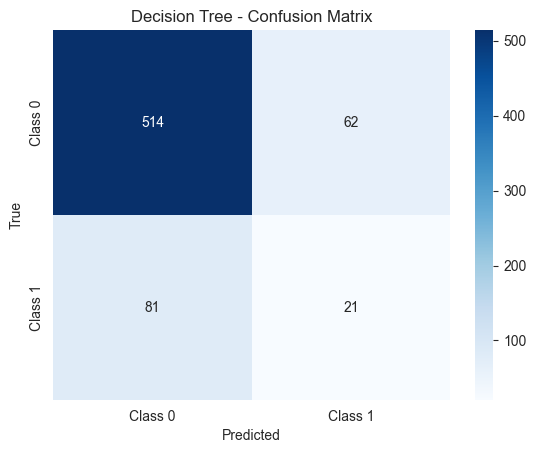

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       576
         1.0       0.25      0.21      0.23       102

    accuracy                           0.79       678
   macro avg       0.56      0.55      0.55       678
weighted avg       0.77      0.79      0.78       678



In [40]:
# Example: Decision Tree with best parameters
best_dt = DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=42)
best_dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = best_dt.predict(X_test)


# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print(classification_report(y_test, y_pred_dt))

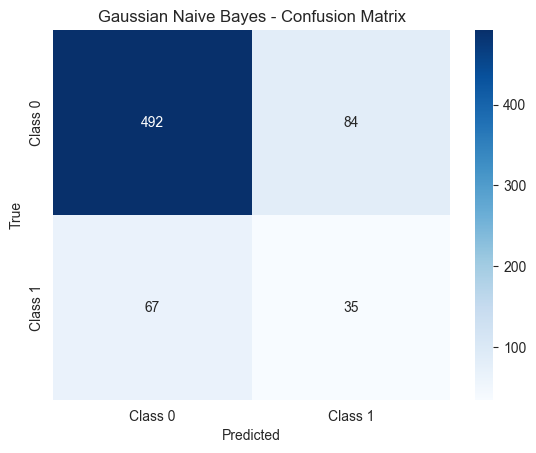

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       576
         1.0       0.29      0.34      0.32       102

    accuracy                           0.78       678
   macro avg       0.59      0.60      0.59       678
weighted avg       0.79      0.78      0.78       678



In [41]:
# Example: Gaussian Naive Bayes
best_gnb = GaussianNB()
best_gnb.fit(X_train_resampled, y_train_resampled)
y_pred_gnb = best_gnb.predict(X_test)


# Confusion matrix
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(conf_matrix_gnb, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Gaussian Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print(classification_report(y_test, y_pred_gnb))

In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize XGBoost model
xgb_model = XGBClassifier(random_state=42, scale_pos_weight=len(y_train_resampled[y_train_resampled == 0]) / len(y_train_resampled[y_train_resampled == 1]))

# Fit the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.96      0.90       576
         1.0       0.29      0.10      0.15       102

    accuracy                           0.83       678
   macro avg       0.58      0.53      0.53       678
weighted avg       0.77      0.83      0.79       678

Confusion Matrix:
 [[552  24]
 [ 92  10]]


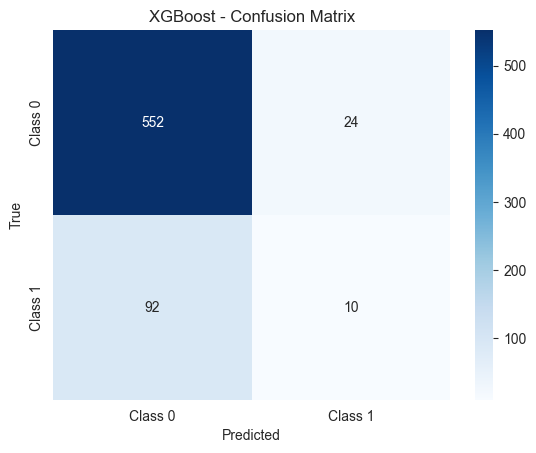

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


## Selected best model

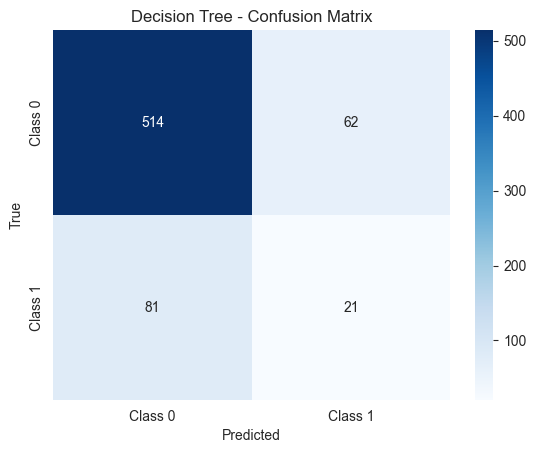

              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88       576
         1.0       0.25      0.21      0.23       102

    accuracy                           0.79       678
   macro avg       0.56      0.55      0.55       678
weighted avg       0.77      0.79      0.78       678



In [44]:
# Example: Decision Tree with best parameters
best_dt = DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=42)
best_dt.fit(X_train_resampled, y_train_resampled)
y_pred_dt = best_dt.predict(X_test)


# Confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification report
print(classification_report(y_test, y_pred_dt))


## Cross validation

In [68]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Decision Tree model
best_dt = DecisionTreeClassifier(criterion="entropy", max_depth=10, random_state=42)

# Define scoring metrics for cross-validation
scoring = {
    "accuracy": "accuracy",
    "precision": make_scorer(precision_score, average="weighted"),
    "recall": make_scorer(recall_score, average="weighted"),
    "f1": make_scorer(f1_score, average="weighted"),
}

# Perform cross-validation
cv_results = cross_validate(best_dt, X_train_resampled, y_train_resampled, cv=10, scoring=scoring)

# Display the results
print("Cross-Validation Results:")
for metric in scoring.keys():
    print(f"{metric.capitalize()}: Mean = {cv_results['test_' + metric].mean():.4f}, Std = {cv_results['test_' + metric].std():.4f}")


Cross-Validation Results:
Accuracy: Mean = 0.8390, Std = 0.1031
Precision: Mean = 0.8487, Std = 0.0887
Recall: Mean = 0.8390, Std = 0.1031
F1: Mean = 0.8342, Std = 0.1126


## Saving the Model

In [74]:
import joblib

# Save the best model to a file
joblib.dump(best_dt, "best_decision_tree_model.pkl")
print("Model saved as 'best_decision_tree_model.pkl'")


Model saved as 'best_decision_tree_model.pkl'


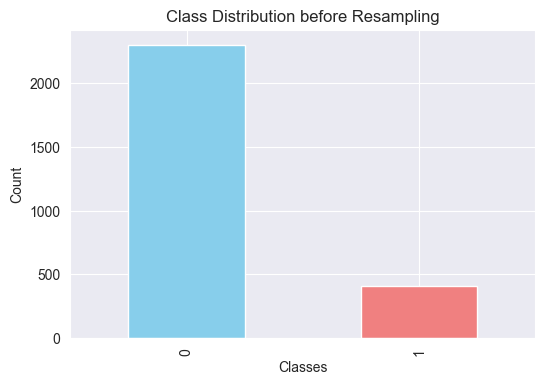

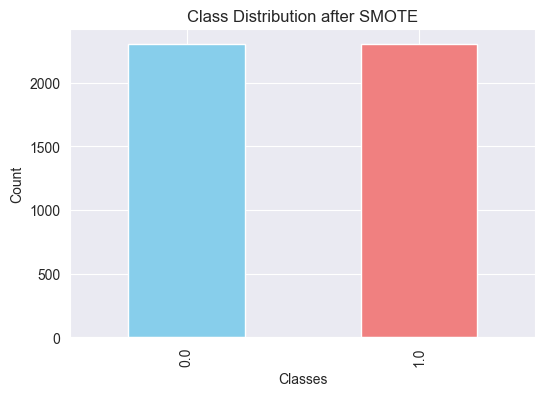

In [70]:
import matplotlib.pyplot as plt

# Visualizing the class distribution in y_train (before resampling)
plt.figure(figsize=(6, 4))
pd.Series(y_train).value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title("Class Distribution before Resampling")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()

# Visualizing the class distribution in y_train_resampled (after resampling)
plt.figure(figsize=(6, 4))
pd.Series(y_train_resampled).value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title("Class Distribution after SMOTE")
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()


**Handle Class Imbalance and Model Building**

In [48]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from imblearn.under_sampling import RandomUnderSampler

In [49]:
# Load your dataset
data = pd.read_csv("Dataset.csv")

In [50]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [51]:
# Get data types of each column
print("\nData Types of Each Column:")
print(data.dtypes)

# For each column, check if it's numerical and print categories if not
for col in data.columns:
    if pd.api.types.is_numeric_dtype(data[col]):
        print(f"{col} is numerical")
    else:
        print(f"{col} is categorical with categories:")
        print(data[col].unique())


Data Types of Each Column:
id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object
id is numerical
age is numerical
education is numerical
sex is categorical with categories:
['F' 'M']
is_smoking is categorical with categories:
['YES' 'NO']
cigsPerDay is numerical
BPMeds is numerical
prevalentStroke is numerical
prevalentHyp is numerical
diabetes is numerical
totChol is numerical
sysBP is numerical
diaBP is numerical
BMI is numerical
heartRate is numerical
glucose is numerical
TenYearCHD is numerical


In [52]:
# Convert 'sex' and 'is_smoking' to numerical using label encoding
data['sex'] = data['sex'].map({'F': 0, 'M': 1})
data['is_smoking'] = data['is_smoking'].map({'NO': 0, 'YES': 1})

In [53]:
data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,1,0,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [54]:
data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [55]:
# Fill missing values with mean for each column
data = data.fillna(data.mean(numeric_only=True))

In [56]:
data.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [57]:
data

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.000000,0,0,0,221.0,148.0,85.0,25.794964,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.000000,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.000000,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.000000,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.000000,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,0,0,0.0,0.000000,0,0,0,261.0,123.5,79.0,29.280000,70.0,103.0,0
3386,3386,46,1.0,0,0,0.0,0.000000,0,0,0,199.0,102.0,56.0,21.960000,80.0,84.0,0
3387,3387,44,3.0,1,1,3.0,0.000000,0,1,0,352.0,164.0,119.0,28.920000,73.0,72.0,1
3388,3388,60,1.0,1,0,0.0,0.029886,0,1,0,191.0,167.0,105.0,23.010000,80.0,85.0,0


In [58]:
# Get the counts of each class in the 'TenYearCHD' column
class_counts = data['TenYearCHD'].value_counts()

print("Counts of each class in 'TenYearCHD':")
print(class_counts)

Counts of each class in 'TenYearCHD':
TenYearCHD
0    2879
1     511
Name: count, dtype: int64


In [59]:
# Separate features (X) and target variable (y)
X = data.drop('TenYearCHD', axis=1)  # Replace 'TenYearCHD' with your target column name
y = data['TenYearCHD']

In [60]:
# Split the data into training and testing sets (stratify ensures balanced class distribution in splits)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [61]:
# Apply SMOTE for oversampling the minority class
#oversample = SMOTE(random_state=42)
#X_resampled, y_resampled = oversample.fit_resample(X_train, y_train)

# Apply RandomUnderSampler to balance the dataset
undersample = RandomUnderSampler(sampling_strategy=1.0, random_state=42)
X_resampled, y_resampled = undersample.fit_resample(X_train, y_train)

In [62]:
# Display the new class distribution
print("Counts of each class after undersampling:")
print(pd.Series(y_resampled).value_counts())

Counts of each class after undersampling:
TenYearCHD
0    409
1    409
Name: count, dtype: int64


In [63]:
# Scale the features
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)
X_test = scaler.transform(X_test)

In [64]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [65]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
print("\nRandom Forest Performance on Test Data:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


Random Forest Performance on Test Data:
              precision    recall  f1-score   support

           0       0.90      0.64      0.75       576
           1       0.23      0.61      0.34       102

    accuracy                           0.64       678
   macro avg       0.57      0.63      0.54       678
weighted avg       0.80      0.64      0.69       678

Confusion Matrix:
 [[370 206]
 [ 40  62]]
ROC-AUC Score: 0.6720792483660131


In [66]:
# # Get predicted probabilities
# y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
#
# # Evaluate the model
# print("Classification Report:")
# print(classification_report(y_test, y_pred))
#
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))
#
# # Compute and print ROC-AUC Score
# roc_auc = roc_auc_score(y_test, y_pred_proba)
# print(f"\nROC-AUC Score: {roc_auc:.4f}")
#
# # Plot the ROC Curve
# RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
# plt.show()


NEWWWWWWWWWWWWWWWWW

In [67]:
print(df.columns)


NameError: name 'df' is not defined

In [916]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Load the dataset
file_path = "Dataset.xlsx"  # Replace with your file path
df = pd.read_excel(file_path)

# Display the first few rows and summary
print(df.head())
print(df.info())
print(df.describe())

# Check for missing values
print("Missing Values:\n", df.isnull().sum())

# Check the class distribution for the target variable
print("Class Distribution:\n", df['TenYearCHD'].value_counts())


   id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0 

In [917]:
# Handling missing values
# For numerical columns, use mean/mode imputation
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

# For categorical columns, use mode imputation
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify no missing values remain
print("Missing Values After Imputation:\n", df.isnull().sum())


Missing Values After Imputation:
 id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


In [918]:
# Separate features and target
X = df.drop('TenYearCHD', axis=1)  # Drop target variable
y = df['TenYearCHD']               # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [919]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Step 1: Check for categorical columns
print(X_train.dtypes)

# Step 2: Handle missing values (if any) in categorical and numeric columns
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Impute missing values
numeric_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

X_train[numeric_cols] = numeric_imputer.fit_transform(X_train[numeric_cols])
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])

# Step 3: Encode categorical columns
# Using OneHotEncoding for categorical variables
if not categorical_cols.empty:
    ct = ColumnTransformer(transformers=[
        ('encoder', OneHotEncoder(drop='first'), categorical_cols)
    ], remainder='passthrough')
    X_train = ct.fit_transform(X_train)

# Convert to a DataFrame (if required for interpretability)
X_train = pd.DataFrame(X_train)

# Step 4: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Step 5: Check class distribution after SMOTE
print("Class Distribution After SMOTE:\n", pd.Series(y_train_smote).value_counts())



id                   int64
age                  int64
education          float64
sex                 object
is_smoking          object
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
dtype: object
Class Distribution After SMOTE:
 TenYearCHD
0    2303
1    2303
Name: count, dtype: int64


In [920]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Step 1: Handle missing values for X_test
X_test[numeric_cols] = numeric_imputer.transform(X_test[numeric_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])

# Step 2: Encode categorical columns for X_test
X_test = ct.transform(X_test)  # Use the same ColumnTransformer (`ct`) from X_train

# Step 3: Standardize both train and test sets
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

# Convert back to DataFrame for interpretability (optional)
X_train_smote = pd.DataFrame(X_train_smote)
X_test = pd.DataFrame(X_test)



In [921]:
# Standardize the features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)


In [922]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Train Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[409 167]
 [ 35  67]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80       576
           1       0.29      0.66      0.40       102

    accuracy                           0.70       678
   macro avg       0.60      0.68      0.60       678
weighted avg       0.83      0.70      0.74       678



In [923]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
print("Confusion Matrix for Random Forest:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Confusion Matrix for Random Forest:
 [[559  17]
 [ 94   8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       576
           1       0.32      0.08      0.13       102

    accuracy                           0.84       678
   macro avg       0.59      0.52      0.52       678
weighted avg       0.78      0.84      0.79       678



In [924]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_smote, y_train_smote)

print("Best Parameters:\n", grid_search.best_params_)


Best Parameters:
 {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [925]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Train the model with the best parameters
best_rf = RandomForestClassifier(
    max_depth=None,
    min_samples_split=2,
    n_estimators=200,
    random_state=42
)
best_rf.fit(X_train_smote, y_train_smote)

# Step 2: Make Predictions on the Test Set
y_pred = best_rf.predict(X_test)

# Step 3: Evaluate the Model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[560  16]
 [ 94   8]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       576
           1       0.33      0.08      0.13       102

    accuracy                           0.84       678
   macro avg       0.59      0.53      0.52       678
weighted avg       0.78      0.84      0.79       678



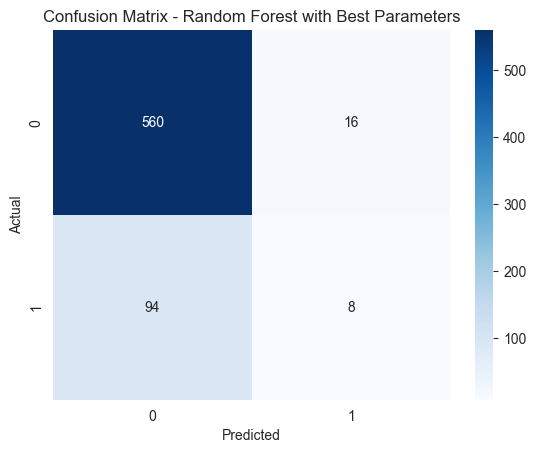

In [926]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest with Best Parameters')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


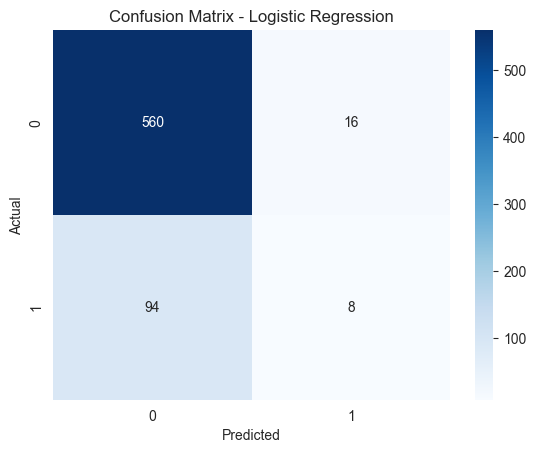

In [927]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Heatmap for Logistic Regression
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [72]:
from sklearn.tree import DecisionTreeClassifier

# Assuming you have loaded X_train, y_train, and X_test

# Create a DecisionTreeClassifier instance
model = DecisionTreeClassifier()

# Train the model on your training data
model.fit(X_train, y_train)

# Now you can use the trained model to make predictions
y_pred_loaded = model.predict(X_test)

print("Model loaded successfully.")

Model loaded successfully.
